## **`Image classification using LeNet CNN`**
<hr/>

**MNIST Dataset - Handwritten Digits (0-9)**
<br/>
<p align="center">
<img src="https://miro.medium.com/max/1168/1*2lSjt9YKJn9sxK7DSeGDyw.jpeg" width="40%" />
</p>


In [53]:
## import tensorflow module

import tensorflow as tf
import numpy as np 

print(tf.__version__)

2.2.0


## **Load the data**

In [54]:
print("[INFO downloading MNIST]")
(trainData , trainLabels) , (testData,testLabels) = tf.keras.datasets.mnist.load_data()

[INFO downloading MNIST]


In [0]:
## Parameter for mnist data set

image_width = 28
image_height = 28
image_channels = 1     # As it already grayscale image
num_classes = 10       # Output whould be range from 0-9 i.e. 10

In [56]:
print(trainData.shape)         # (no. of image , width , height)
print(testData.shape)
print(trainLabels.shape)
print(testLabels.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [0]:
# num_samples x rows x columns x depth (channel)

trainData = trainData.reshape(trainData.shape[0] ,image_height,image_width,image_channels)
testData = testData.reshape(testData.shape[0] ,image_height,image_width,image_channels)

In [58]:
print(trainData.shape)         # (no. of image , width , height, channel)
print(testData.shape)
print(trainLabels.shape)
print(testLabels.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000,)
(10000,)


In [0]:
# We normalize the image 
# we scale them between [0.0,1.0]

trainData = trainData.astype("float32") / 255.0 
testData = testData.astype("float32") / 255.0


## **LeNet architecture**

<a href="https://ibb.co/QDrXtJy"><img src="https://i.ibb.co/LNnvH0V/Architecture.jpg" alt="Architecture" border="0"></a>

Tanh activation for all layers. <br/>
Softmax activation for last (output) layer.

In [0]:
'''
      As we are using LeNet architecture we pad the input image of size 28x28 
      into 32x32 size image

'''
trainData = np.pad(trainData, ((0,0) , (2,2) , (2,2) , (0,0)), 'constant')
testData = np.pad(testData , ((0,0) , (2,2) , (2,2) , (0,0)), 'constant')

In [61]:
print(trainData.shape)         # (no. of image , width , height, channel)
print(testData.shape)
print(trainLabels.shape)
print(testLabels.shape)

(60000, 32, 32, 1)
(10000, 32, 32, 1)
(60000,)
(10000,)


In [0]:
## Updated parameter for mnist data set

image_width = 32
image_height = 32
image_channels = 1     # As it already grayscale image
num_classes = 10       # Output whould be range from 0-9 i.e. 10

##**Import package**

In [0]:
from tensorflow.keras import backend
from tensorflow.keras import models
from tensorflow.keras import layers

# define the model as a class
class LeNet:

  '''
      In a sequential model, we stack layers sequentially. 
      So, each layer has unique input and output, and those inputs and outputs 
      then also come with a unique input shape and output shape.
  
  '''
  # 2 Convolutional unit (conv,activation,pooling)
  # INPUT => CONV => TANH => AVG-POOL => CONV => TANH => AVG-POOL => FC => TANH => FC => TANH => FC => SOFTMAX
  
  @staticmethod                ## class can instantiated only once 
  def init(numChannels, imgRows, imgCols , numClasses, weightsPath=None):
    
    # if we are using channel first we have update the input size
    if backend.image_data_format() == "channels_first":
      inputShape = (numChannels , imgRows , imgCols)
    else: 
      inputShape = (imgRows , imgCols , numChannels)
    
    # initilize the model
    model = models.Sequential()

    # Define the first set of CONV => ACTIVATION => POOL LAYERS
    '''
      Padding: valid means 0 zero padding 
    '''
    model.add(layers.Conv2D(  filters=6,kernel_size=(5,5),strides=(1,1), 
                              padding="valid",activation=tf.nn.tanh,input_shape=inputShape))
    model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    # Define the second set of CONV => ACTIVATION => POOL LAYERS

    model.add(layers.Conv2D(  filters=16,kernel_size=(5,5),strides=(1,1), 
                              padding="valid",activation=tf.nn.tanh,input_shape=inputShape))
    model.add(layers.AveragePooling2D(pool_size=(2,2),strides=(2,2)))

    # Flatten the convolution volume to fully connected layers (convert them into single vector)

    model.add(layers.Flatten())

    # Define the first FC layer + Activation 

    model.add(layers.Dense(units=120, activation=tf.nn.tanh))

    # Define the second FC layer + Activation 

    model.add(layers.Dense(units=84, activation=tf.nn.tanh))

    # lastly , define the softmax classifier

    model.add(layers.Dense(units=numClasses,activation=tf.nn.softmax))

    # if a weights path is supplied (indicating that the model was pre-trained)
    # then add weights

    if weightsPath is not None:
      model.load_weights(weightsPath)
    
    # return the constructed network architecture
    return model

    '''
      NOTE :  Instead adding each layer step by step we can also do 

              model = tf.keras.sequantial([
                          tf.keras.layers.conv2d(.....)
                          tf.keras.layers.averagepooling2d(.....)
                          tf.keras.layers.flatten(.....)
                          tf.keras.layers.dense(.....)
                      ])
              Add layers in the array
    '''

## **Compile model**

In [74]:
print("[INFO] Compiling model ... ")
model = LeNet.init(numChannels=image_channels,
                    imgRows=image_width,
                    imgCols=image_height,
                    numClasses=num_classes,
                    weightsPath=None                      
                   )

# Compile the model 

'''
    As our labels are number then we use "Sparse categorical cross entropy"
    if our labels are one hot encoding vector then we "categorical cross entropy" 
    The only difference between sparse categorical cross entropy and categorical cross entropy is the format of true labels
'''

# Specify the training configuration (optimizer, loss, metrics)

model.compile(
              optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
            )

# Print model summery
model.summary()

[INFO] Compiling model ... 
Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_18 (Averag (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_19 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 120)               48120     
_________________________________________________________________
dense_28 (Dense)          

##**Train Model**

In [76]:
'''
    Define a callback function for training termination criteria
    accuracy cutoff = 0.99  (After 0.99 accuracy is reached ,then model will freez i.e weight updation will never happen)
'''

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs=None):
    if(logs.net('accuracy')>0.99):
      print("\n Reached 99% accuracy to cancelling training")
      self.model.stop_training = True

# initilize training config 
batch_size = 128
epochs = 100

# Run training
print("[INFO] Training ...")

history = model.fit(x=trainData , y=trainLabels , validation_data=(testData,testLabels),
                    batch_size=batch_size,epochs=epochs,
                    verbose=1)

print('\nhistory dict:', history.history)

[INFO] Training ...
Epoch 1/100
469/469 [==============================] - 30s 63ms/step - loss: 1.3432 - accuracy: 0.7237 - val_loss: 0.9848 - val_accuracy: 0.7874
Epoch 2/100
469/469 [==============================] - 30s 63ms/step - loss: 0.8428 - accuracy: 0.8021 - val_loss: 0.7021 - val_accuracy: 0.8308
Epoch 3/100
469/469 [==============================] - 30s 64ms/step - loss: 0.6573 - accuracy: 0.8345 - val_loss: 0.5833 - val_accuracy: 0.8555
Epoch 4/100
469/469 [==============================] - 30s 64ms/step - loss: 0.5656 - accuracy: 0.8543 - val_loss: 0.5138 - val_accuracy: 0.8708
Epoch 5/100
469/469 [==============================] - 30s 64ms/step - loss: 0.5076 - accuracy: 0.8669 - val_loss: 0.4672 - val_accuracy: 0.8802
Epoch 6/100
469/469 [==============================] - 30s 64ms/step - loss: 0.4668 - accuracy: 0.8751 - val_loss: 0.4334 - val_accuracy: 0.8851
Epoch 7/100
469/469 [==============================] - 30s 64ms/step - loss: 0.4362 - accuracy: 0.8817 - val_l

##**Visualization**

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

# retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['accuracy']                         
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))        ## get number of epochs

##**Plot training and validation accuracy per epoch**

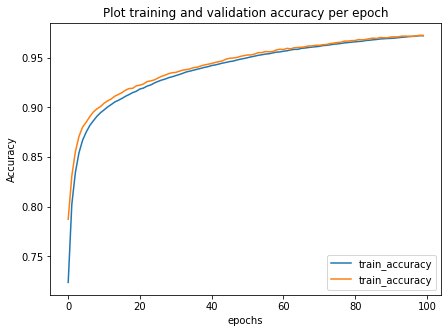

In [89]:
plt.figure(figsize=(7,5))
plt.plot(epochs, acc,label='train_accuracy')
plt.plot(epochs, val_acc,label='train_accuracy')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="lower right")
plt.title('Plot training and validation accuracy per epoch')
plt.show()


##**Plot training and validation loss per epoch**


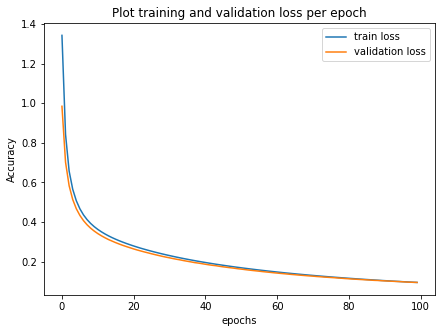

In [88]:
plt.figure(figsize=(7,5))
plt.plot(epochs, loss,label='train loss')
plt.plot(epochs, val_loss,label='validation loss')
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.legend(loc="upper right")
plt.title('Plot training and validation loss per epoch')
plt.show()

##**Show accuracy on the testing data**

In [90]:
print("[INFO] Evaluating ... ")
(loss,accuracy) = model.evaluate(testData,testLabels,batch_size=batch_size,verbose=1)
print("[INFO] accuracy : {:.2f}%".format(accuracy*100))

[INFO] Evaluating ... 
79/79 [==============================] - 2s 26ms/step - loss: 0.0948 - accuracy: 0.9727
[INFO] accuracy : 97.27%


In [0]:
## Save the weight
'''
Instead of saving weights we can also save model i.e. model.save_model(filename)
and whenever you want , you can use them using model.load_model(filename)
'''

model.save_weights("weights/LeNetMNIST.temp.hd5",overwrite=True)


##**Evaluate pre-trained model**

In [92]:
print("[INFO] Compiling model ... ")

'''
  Use the saved weights here so that we don't have 
  to re train the model again. But again the better way is just use
  1. save_model property
  2. load_model propterty 
  instead of saving weights , 

'''
model = LeNet.init(numChannels=image_channels,
                    imgRows=image_width,
                    imgCols=image_height,
                    numClasses=num_classes,
                    weightsPath="weights/LeNetMNIST.temp.hd5"                      
                   )

model.compile(
              optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.01),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy']
            )


[INFO] Compiling model ... 


In [93]:
print("[INFO] Evaluating ... ")
(loss,accuracy) = model.evaluate(testData,testLabels,batch_size=batch_size,verbose=1)
print("[INFO] accuracy : {:.2f}%".format(accuracy*100))

[INFO] Evaluating ... 
79/79 [==============================] - 2s 26ms/step - loss: 0.0948 - accuracy: 0.9727
[INFO] accuracy : 97.27%


##**Model predictions**

In [0]:
# import package -> OpenCV
import cv2               # cv : computer vision libray

In [105]:
# set up matplotlib fig and size it to fit 3 rows and 4 col

nrows = 3
ncols = 4
'''
matplotlib.pyplot.gcf() is primarily used to get the current figure.
If no current figure is available then one is created with the help of the figure() function

'''
fig = plt.gcf()
fig.set_size_inches(ncols*6 , nrows*6)

<Figure size 1728x1296 with 0 Axes>

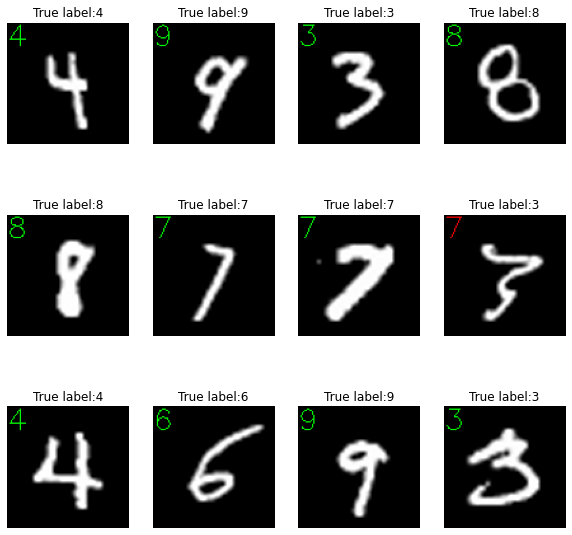

In [111]:
# Randomly select a few testing image
plt.figure(figsize=(10,10))
num_prediction = 12

'''
Generate a uniform random sample from np.arange(5) of size 3:

>>> np.random.choice(5, 3)
array([0, 3, 4])
>>> #This is equivalent to np.random.randint(0,5,3)

'''
# index of selected random image from test dataset
test_indices = np.random.choice(np.arange(0, len(testLabels)),size=(num_prediction,))     

# Get the testing image using list comprehension
test_images = np.stack(([ testData[i] for i in test_indices ]))

# Get the testing image labels using list comprehension
test_labels = np.stack(([ testLabels[i] for i in test_indices ])) 

# Compute_prediction
predictions = model.predict(test_images)

for i in range(num_prediction):

  '''
  As output would be in the form of probability as we are using softmax function
  at output layer , so we are choosing the class which have highest probability
  '''
  prediction = np.argmax(predictions[i])

  # rescale the test image 
  # As it was normailize between 0 to 1 
  image = (test_images[i]*255).astype("uint8") 

  # resize the image from a 28x28 images into 96x96 so that can see the image clearly
  image = cv2.resize(image, (96,96), interpolation=cv2.INTER_CUBIC)

  # convert grayscale into rgb color , 3 represent -: 3 channels
  image = cv2.merge([image]*3)

  # if prediction == ground truth label then mark with green else with red
  if prediction == test_labels[i]:
    rgb_color = (0,255,0)       ## true prediction
  else:
    rgb_color = (255,0,0)       ## False prediction

  # put text on the image
  cv2.putText(image, str(prediction),(0,18), cv2.FONT_HERSHEY_SIMPLEX,0.75,rgb_color,1)

  # set up subplot ; subplot indices starts from 1
  sp = plt.subplot(nrows,ncols,i+1,title="True label:%s"% test_labels[i])
  sp.axis('Off')      # Don't show axis
  plt.imshow(image)

plt.show()  